# More Image Processing with scikit-image

## Edge Detection

In [52]:
from skimage.color import rgb2gray
from skimage.filters import sobel # edge detection
from skimage.filters import gaussian # smoothing
from skimage import exposure # contrast adjustment
from skimage import data
from skimage import transform # manipulation
import matplotlib.pyplot as plt
import numpy as np


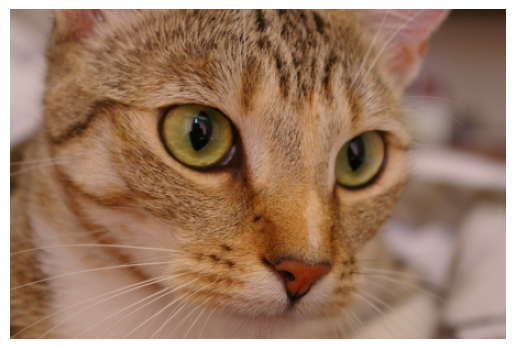

In [2]:
cat = data.chelsea()
plt.axis("off")
plt.imshow(cat)
plt.show()

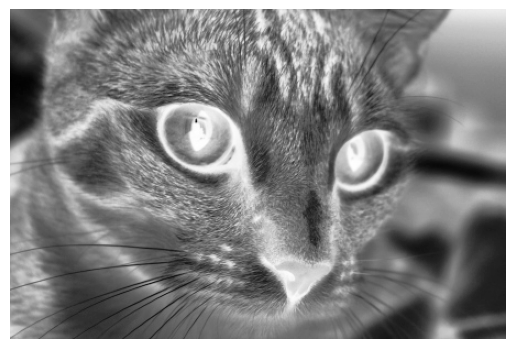

In [3]:
# sobel edge detection only works with grayscale images
cat_grays = rgb2gray(cat)
plt.axis("off")
plt.imshow(cat_grays, cmap="Greys")
plt.show()

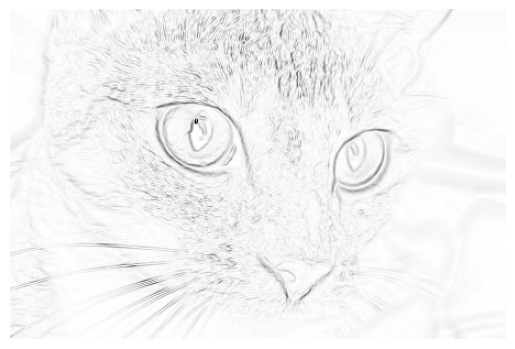

In [4]:
cat_edges = sobel(cat_grays)
plt.axis("off")
plt.imshow(cat_edges, cmap="Greys")
plt.show()

***
## Smoothing

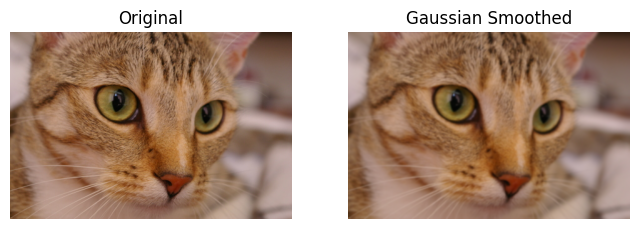

In [5]:
smooth_cat = gaussian(cat, multichannel=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
ax1.imshow(cat)
ax1.set_title("Original")
ax1.axis("off")
ax2.imshow(smooth_cat)
ax2.axis("off")
ax2.set_title("Gaussian Smoothed")
plt.show()

***
## Improving Contrast

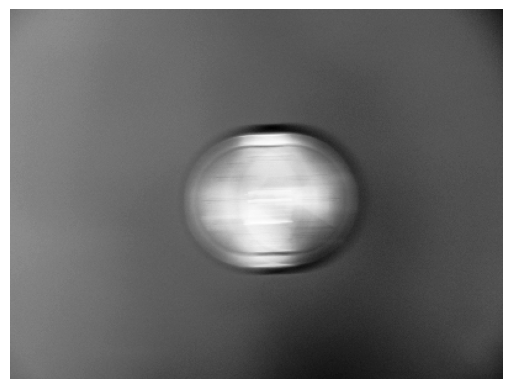

In [6]:
pendulum = data.clock()
pen2 = pendulum *-1 # invert the grayscale
plt.axis("off")
plt.imshow(pen2, cmap="Greys")
plt.show()

In [7]:
# easy to calculate the contrast:
c = np.max(pen2) - np.min(pen2)
c

148

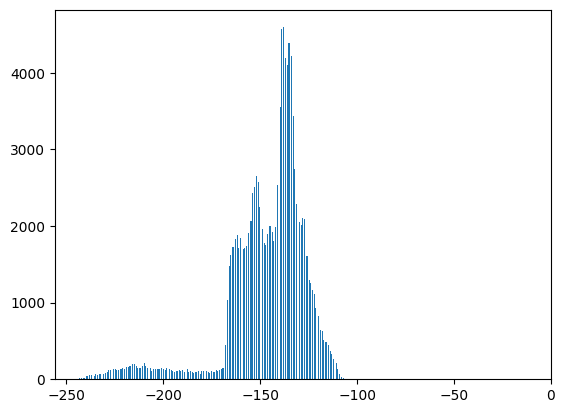

In [8]:
plt.hist(pen2.ravel(), bins=256)
plt.xlim([-256, 0])
plt.show()

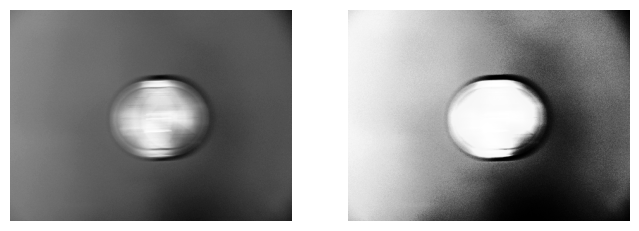

In [9]:
pen_eq = exposure.equalize_hist(pen2)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
ax1.axis("off")
ax1.imshow(pen2, cmap="Greys")
ax2.axis("off")
ax2.imshow(pen_eq, cmap="Greys")
plt.show()

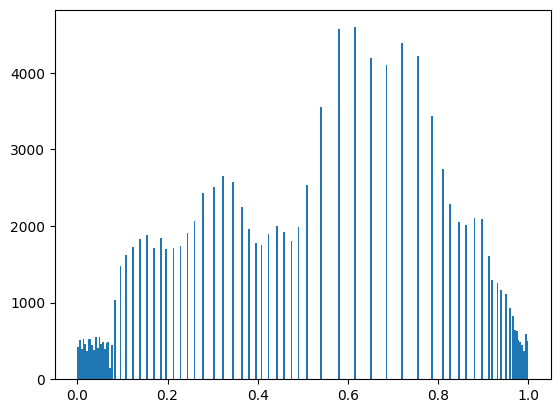

In [10]:
peneq_hist = plt.hist(pen_eq.ravel(), bins=256)
plt.show()

### Neighbourhood Contrast Improvement

The above method adjusts the entire histogram, but neighbourhood contrast
adaptation can produce better outcomes, particularly if the exposure of the
image is uneven. Let's take a look at this approach with `equalize_adapthist()`
. 

Note a `clip_limit` parameter will need to be tuned. Higher clip limits give
a large contrast and a normalised float is expected.

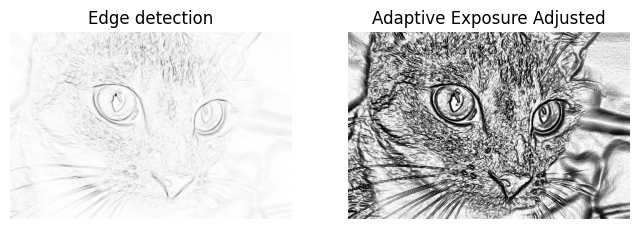

In [48]:
cat_edges_eq = exposure.equalize_adapthist(cat_edges, clip_limit=0.05)

fig, (ax1, ax2) = plt.subplots(
    ncols=2, figsize=(8, 6), sharex=True, sharey=True
    )
ax1.imshow(cat_edges, cmap="Greys")
ax1.axis("off")
ax1.set_title("Edge detection")
ax2.imshow(cat_edges_eq, cmap="Greys")
ax2.axis("off")
ax2.set_title("Adaptive Exposure Adjusted")
plt.show()


This approach also works with color images

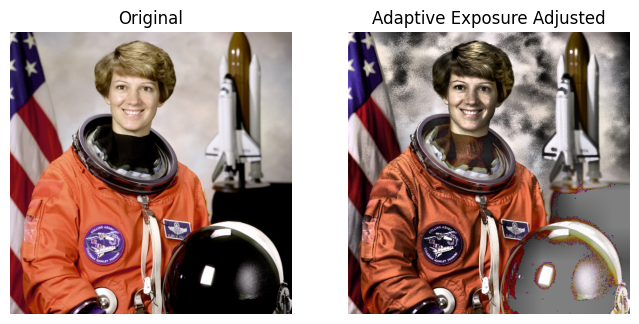

In [51]:
astro = data.astronaut()
astro_eq = exposure.equalize_adapthist(astro, clip_limit=0.5)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
ax1.axis("off")
ax1.set_title("Original")
ax1.imshow(astro)
ax2.axis("off")
ax2.imshow(astro_eq)
ax2.set_title("Adaptive Exposure Adjusted")
plt.imshow(astro_eq)
plt.show()


***

## More Image Manipulation

Rotating an image takes **negative** values for clockwise rotation.

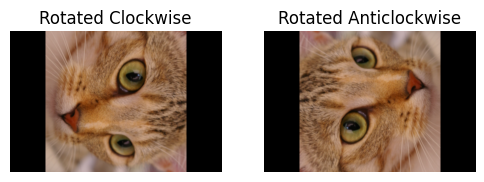

In [64]:
cat_r = transform.rotate(cat, -90)
cat_l = transform.rotate(cat, 90)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 8), sharex=True, sharey=True)
ax1.imshow(cat_r)
ax1.axis("off")
ax1.set_title("Rotated Clockwise")
ax2.imshow(cat_l)
ax2.axis("off")
ax2.set_title("Rotated Anticlockwise")
plt.show()

Rescaling can be employed with or without anti-aliasing. Anti-aliasing can be
used to avoid pixelation at the cost of reduced sharpness.

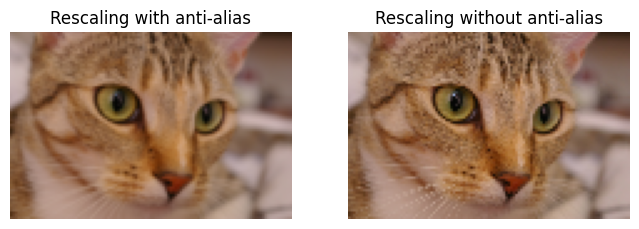

In [79]:
rescale_cat_aa = transform.rescale(cat, 1/4, multichannel=True)
rescale_cat_noaa = transform.rescale(cat, 1/4, anti_aliasing=False, multichannel=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
ax1.imshow(rescale_cat_aa)
ax1.axis("off")
ax1.set_title("Rescaling with anti-alias")
ax2.imshow(rescale_cat_noaa)
ax2.axis("off")
ax2.set_title("Rescaling without anti-alias")
plt.show()

### Resizing vs Rescaling

So far we have used rescale. If you wish to resize to a known height / weight
combination instead of applying a rescale factor, use resize instead. This is
also true if you would like to rescale based on a fraction of the original
image's dimensions.

Text(0.5, 1.0, 'Downscaled')

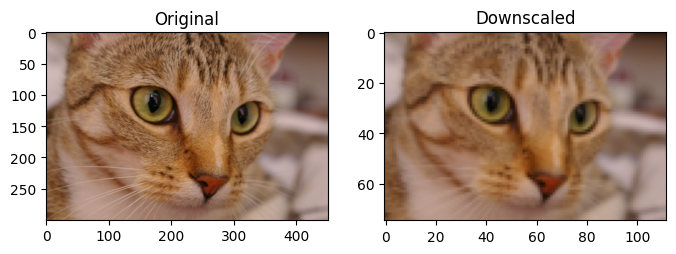

In [83]:
new_height = int(cat.shape[0] / 4)
new_width = int(cat.shape[1] / 4)
new_cat = transform.resize(cat, (new_height, new_width), anti_aliasing=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6))
ax1.imshow(cat)
ax1.set_title("Original")
ax2.imshow(new_cat)
ax2.set_title("Downscaled")
# Note the num pixels in the downscaled images have been reduced by 4